In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls /content/drive/My\ Drive

'AI IN INDIA.gdoc'
'AI prestentation.gdoc'
 bank_transactions_data_2.csv
 Classroom
'Colab Notebooks'
'Combined Data.csv'
'COVER LETTER 2025                                                                                 Roskilde.gdoc'
 df1_meta.csv
 Einstein.gdoc
 Fake.csv
'Fake Postings.csv'
'Fendous  blood group detection app.gdoc'
'Fendous@ detection of phishing mail.gdoc'
'kaggle (5).json'
'LISTEN TO YOUR HEART.gslides'
 movie_metadata.csv
 movies_metadata.csv
 new.csv
 Nupur_Project_ppt.pptx
 predictions_plot.png
'Project proposal.gdoc'
 reviews.txt
 Singh_nupur.pdf
 Sleep_health_and_lifestyle_dataset.csv
 SMSSpamCollection.txt
'spam (1).csv'
 test.csv
 tmdb_5000_movies1.csv
 train.csv
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document.gdoc'
 val.csv
 YoutubeCommentsDataSet.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
 csv_path = "/content/drive/My Drive/Combined Data.csv"
 df = pd.read_csv(csv_path)

In [5]:
df.head(4)

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety


In [6]:
df.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [7]:
df.shape

(53043, 3)

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,0
status,0


In [11]:
df["status"].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [12]:
status_counts = df["status"].value_counts()
print(status_counts)

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


<ipython-input-13-197dda0248ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="status", order=df["status"].value_counts().index, palette="Set2")


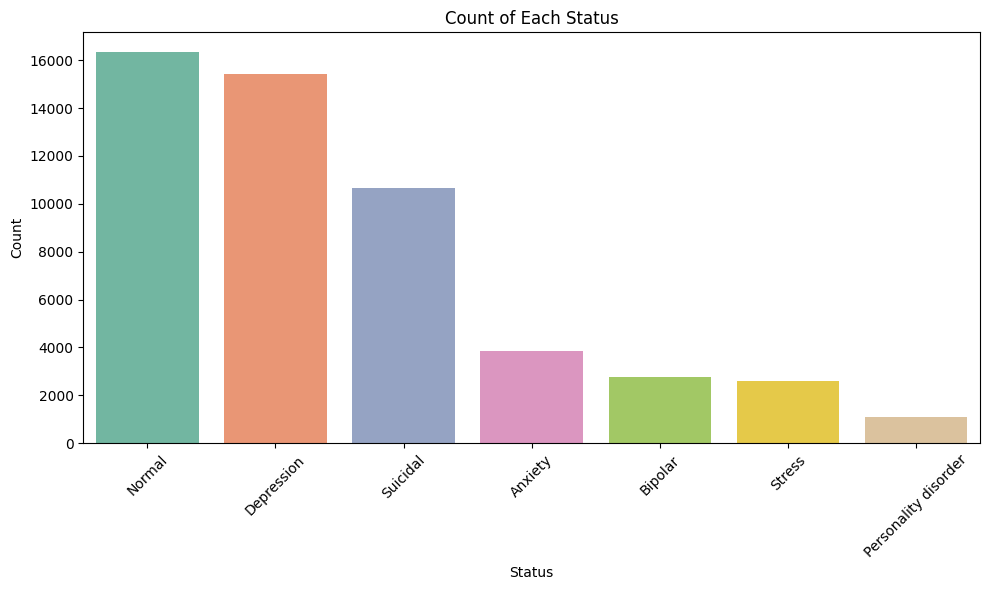

In [13]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=df, x="status", order=df["status"].value_counts().index, palette="Set2")

# Add labels and title
plt.title("Count of Each Status")
plt.xlabel("Status")
plt.ylabel("Count")


plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [14]:
x = df.drop("status",axis=1)

In [15]:
y = df["status"]

In [16]:
data = {"status": ["Normal", "Depression", "Suicidal", "Anxiety", "Bipolar", "Stress", "Personality disorder"]}
df = pd.DataFrame(data)

# Encode the status column
df["status_number"] = pd.factorize(df["status"])[0]
print(df)

                 status  status_number
0                Normal              0
1            Depression              1
2              Suicidal              2
3               Anxiety              3
4               Bipolar              4
5                Stress              5
6  Personality disorder              6


In [17]:
x.shape

(52681, 2)

In [18]:
y.shape

(52681,)

In [19]:
import tensorflow as tf

In [20]:
print(tf.__version__)

2.18.0


In [22]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [24]:
voc_size = 5000


In [26]:
messages = x.copy()

In [27]:
messages["statement"][1]

'trouble sleeping, confused mind, restless heart. All out of tune'

In [28]:
import nltk
import re
from nltk.corpus import stopwords

In [29]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
messages.reset_index(drop=True,inplace=True)
corpus = []
for i in range(0,len(messages)):
  review = re.sub("[^a-zA-Z]"," ",messages["statement"][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word)for word in review if not word in stopwords.words("english")]
  review = " ".join(review)
  corpus.append(review)

In [31]:
corpus

['oh gosh',
 'troubl sleep confus mind restless heart tune',
 'wrong back dear forward doubt stay restless restless place',
 'shift focu someth els still worri',
 'restless restless month boy mean',
 'everi break must nervou like someth wrong heck',
 'feel scare anxiou may famili us protect',
 'ever felt nervou know',
 'slept well day like restless huh',
 'realli worri want cri',
 'alway restless everi night even though know wrong strang',
 'confus feel good late everi time want sleep alway feel restless',
 'sometim need problem laugh forget problem rememb feel restless like well turn still sad burden blah blah blah',
 'worri',
 'sometim thought make anxiou afraid close eye sleep',
 'everi time wake definit nervou excit go tri',
 'hope even though worri start like',
 'restiv restless restless',
 'regret grudg angri thing pass worri much futur true seren',
 'guy sick girl actual feel sick indirectli must feel restless restless',
 'anxiou person becam sincer person also worri person end'

In [32]:
one_hot_repr = [one_hot(words,voc_size)for words in corpus]

In [33]:
one_hot_repr

[[633, 659],
 [1064, 1086, 1554, 603, 2313, 3616, 1747],
 [727, 4787, 3472, 1822, 2374, 1017, 2313, 2313, 3383],
 [1419, 4774, 2104, 3302, 656, 3659],
 [2313, 2313, 2445, 2422, 2435],
 [4014, 3889, 3255, 350, 1154, 2104, 727, 2525],
 [3338, 1297, 3341, 3338, 4105, 1909, 4474],
 [4864, 4691, 350, 1534],
 [3370, 4755, 3433, 1154, 2313, 1499],
 [4885, 3659, 2876, 4780],
 [4340, 2313, 4014, 3870, 335, 1672, 1534, 727, 501],
 [1554, 3338, 4718, 2093, 4014, 3588, 2876, 1086, 4340, 3338, 2313],
 [3374,
  681,
  1187,
  2272,
  2223,
  1187,
  6,
  3338,
  2313,
  1154,
  4755,
  3717,
  656,
  3999,
  1616,
  3730,
  3730,
  3730],
 [3659],
 [3374, 3072, 2888, 3341, 4361, 1207, 4518, 1086],
 [4014, 3588, 4772, 598, 350, 4107, 479, 3478],
 [2324, 335, 1672, 3659, 3113, 1154],
 [1450, 2313, 2313],
 [4820, 926, 765, 2900, 2993, 3659, 2783, 4053, 3026, 1318],
 [2262, 68, 164, 1695, 3338, 68, 4416, 3255, 3338, 2313, 2313],
 [3341, 4345, 2743, 4267, 4345, 1991, 3659, 4345, 3638],
 [98, 4256, 335, 1

In [34]:
corpus[1]

'troubl sleep confus mind restless heart tune'

In [35]:
one_hot_repr[1]

[1064, 1086, 1554, 603, 2313, 3616, 1747]

In [36]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_repr,padding = "pre",maxlen = sent_length)
embedded_docs

array([[   0,    0,    0, ...,    0,  633,  659],
       [   0,    0,    0, ..., 2313, 3616, 1747],
       [   0,    0,    0, ..., 2313, 2313, 3383],
       ...,
       [   0,    0,    0, ..., 3870, 2642, 3224],
       [2409, 4345, 1317, ...,  850, 3271, 2783],
       [ 346,  828, 3868, ..., 1187,  672, 1639]], dtype=int32)

In [37]:
embedded_docs[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 633, 659], dtype=int32)

In [39]:
len(embedded_docs),y.shape

(52681, (52681,))

In [40]:
y.head(4)

,status
0,Anxiety
1,Anxiety
2,Anxiety
3,Anxiety


In [41]:
y_one_hot = pd.get_dummies(df["status"]).astype(int)
print(y_one_hot.head())

   Anxiety  Bipolar  Depression  Normal  Personality disorder  Stress  \
0        0        0           0       1                     0       0   
1        0        0           1       0                     0       0   
2        0        0           0       0                     0       0   
3        1        0           0       0                     0       0   
4        0        1           0       0                     0       0   

   Suicidal  
0         0  
1         0  
2         1  
3         0  
4         0  


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define parameters
voc_size = 5000  # Example vocabulary size
embedding_vector_features = 40
sent_length = 20  # Example sentence length
num_classes = y_one_hot.shape[1]  # Number of classes from one-hot encoded target

# Create the model
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=embedding_vector_features))
model.add(LSTM(100))  # LSTM layer
model.add(Dense(num_classes, activation="softmax"))  # Output layer for multi-class classification

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Build the model with input shape
model.build(input_shape=(None, sent_length))  # Explicitly setting input shape
# Print the model summary
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 20, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257,107 (1004.32 KB)

 Trainable params: 257,107 (1004.32 KB)

 Non-trainable params: 0 (0.00 B)

None


In [52]:
len(embedded_docs),y.shape

(52681, (52681,))

In [54]:
x_final = np.array(embedded_docs)
y_final = np.array(y)

In [55]:
x_final.shape,y_final.shape

((52681, 20), (52681,))

In [57]:

# Convert string labels to integer labels
unique_labels = np.unique(y_final)
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
y_final_int = np.array([label_to_int[label] for label in y_final])

# Now one-hot encode y_final_int
num_classes = len(unique_labels)  # Number of unique classes
y_final_one_hot = to_categorical(y_final_int, num_classes=num_classes)

In [58]:
x_final.shape,y_final_one_hot.shape

((52681, 20), (52681, 7))

In [59]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final_one_hot, test_size=0.33, random_state=42)



In [61]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9290 - loss: 0.1910 - val_accuracy: 0.6458 - val_loss: 1.7988
Epoch 2/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9357 - loss: 0.1786 - val_accuracy: 0.6456 - val_loss: 1.9121
Epoch 3/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9427 - loss: 0.1621 - val_accuracy: 0.6410 - val_loss: 2.0149
Epoch 4/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9489 - loss: 0.1451 - val_accuracy: 0.6346 - val_loss: 2.1080
Epoch 5/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9502 - loss: 0.1395 - val_accuracy: 0.6372 - val_loss: 2.1210
Epoch 6/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9550 - loss: 0.1262 - val_accuracy: 0.6342 - val_loss: 2.2768
Epoch 7/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9599 - loss: 0.1143 - val_accuracy: 0.6406 - val_loss: 2.2396
Epoch 8/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9638 - loss: 0.1049 - val_accuracy: 

In [66]:
from sklearn.metrics import accuracy_score

# Get predicted probabilities
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test back to class labels
y_true = np.argmax(y_test, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Manual Test Accuracy:", accuracy)

544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Manual Test Accuracy: 0.6300834052343974


Epoch 1/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.6274 - val_loss: 3.8475
Epoch 2/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9946 - loss: 0.0184 - val_accuracy: 0.6299 - val_loss: 3.6511
Epoch 3/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.6362 - val_loss: 3.8059
Epoch 4/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.6278 - val_loss: 3.7356
Epoch 5/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9968 - loss: 0.0106 - val_accuracy: 0.6309 - val_loss: 3.8451
Epoch 6/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9977 - loss: 0.0084 - val_accuracy: 0.6300 - val_loss: 3.7802
Epoch 7/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9970 - loss: 0.0102 - val_accuracy: 0.6305 - val_loss: 3.8593
Epoch 8/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9967 - loss: 0.0101 - val_accuracy: 0

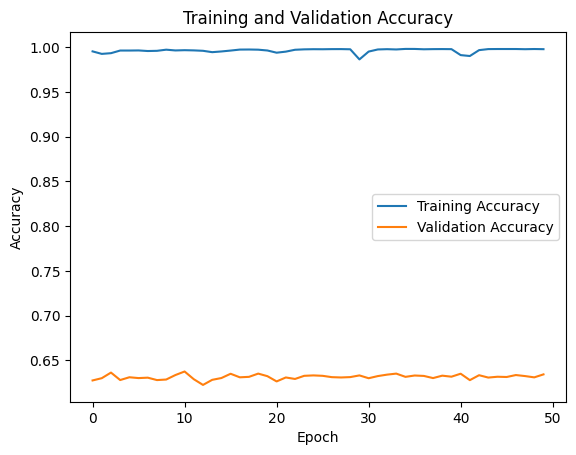

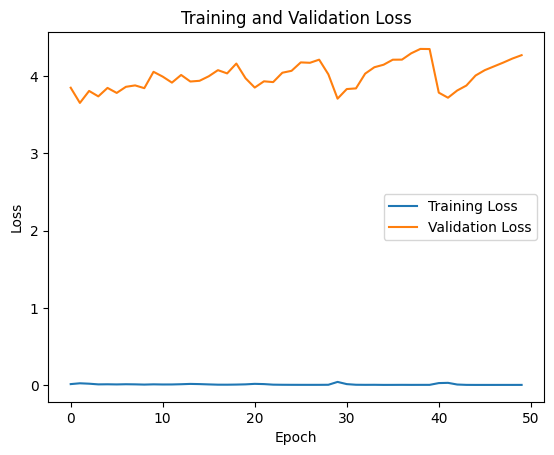

In [68]:
import matplotlib.pyplot as plt
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()